# Homework # 4 Naive BAYES Classifier

### Instructor - Dr. Uma Gajendragadkar

### Problem - Design and develop Machine learning model to predict Diabetes using Naive Bayes Algorithm. 

### Dataset - Diabetes dataset

This dataset consists of 768 observations & 8 numerical independent variables.
Dependent and target variable is OUTCOME. 1 means diabetes test result being positive, 0 means indicates negative.

Pregnancies: Number of Times Being Pregnant

Glucose: Plasma Glucose Concentration (a 2 hours in an oral glucose tolerance test)

BloodPressure: Diastolic Blood Pressure (mm Hg)

SkinThickness: Triceps Skin Fold Thickness (mm)

Insulin: 2-Hour Serum Insulin (mu U/ml)

BMI: Body Mass Index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes Pedigree Function

Age: Age

Outcome: Class variable ( 0 - 1)



In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_validate
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot  as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB

Step 1 - Write code to Read data from dataset into pandas dataframe

In [76]:
df = pd.read_csv('diabetes.csv')

Step 2 - a) Write code to display dataset info 
b) Print 10 rows from dataset.

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [78]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1
5,5,116,74,0,0,25.600,0.201,30,0
6,3,78,50,32,88,31.000,0.248,26,1
7,10,115,0,0,0,35.300,0.134,29,0
8,2,197,70,45,543,30.500,0.158,53,1
9,8,125,96,0,0,0.000,0.232,54,1


Step 3 - Write code to remove Pregnancy column 

In [79]:
df.drop("Pregnancies", axis=1)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.600,0.627,50,1
1,85,66,29,0,26.600,0.351,31,0
2,183,64,0,0,23.300,0.672,32,1
3,89,66,23,94,28.100,0.167,21,0
4,137,40,35,168,43.100,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.900,0.171,63,0
764,122,70,27,0,36.800,0.340,27,0
765,121,72,23,112,26.200,0.245,30,0
766,126,60,0,0,30.100,0.349,47,1


Step 4 - Write code to display info of dataset and check shape of dataset.

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [81]:
df.shape

(768, 9)

Step 5 - Write code to clean data

In [82]:
# Checking null values
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [83]:
# Since there are no null values, I replaced all 0 values to the mean of every value's respective column
blood_mean = df['BloodPressure'].mean()
df['BloodPressure'] = df['BloodPressure'].replace(0, blood_mean)

skin_mean = df['SkinThickness'].mean()
df['SkinThickness'] = df['SkinThickness'].replace(0, skin_mean)

insu_mean = df['Insulin'].mean()
df['Insulin'] = df['Insulin'].replace(0, insu_mean)
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.000,35.000,79.799,33.600,0.627,50,1
1,1,85,66.000,29.000,79.799,26.600,0.351,31,0
2,8,183,64.000,20.536,79.799,23.300,0.672,32,1
3,1,89,66.000,23.000,94.000,28.100,0.167,21,0
4,0,137,40.000,35.000,168.000,43.100,2.288,33,1
5,5,116,74.000,20.536,79.799,25.600,0.201,30,0
6,3,78,50.000,32.000,88.000,31.000,0.248,26,1
7,10,115,69.105,20.536,79.799,35.300,0.134,29,0
8,2,197,70.000,45.000,543.000,30.500,0.158,53,1
9,8,125,96.000,20.536,79.799,0.000,0.232,54,1


Step 6 - Split data into training and testing sets ( 80: 20 ratio)

In [84]:
# Split into independant and dependant variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Normalize features 
scaler = StandardScaler()
X= scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### **Step #7: Initialize your model**




In [85]:
model = GaussianNB()

#### **Step #8: Fit your model, test on the testing data, and create a visualization if applicable**

In [86]:
model.fit(X_train, y_train)

# Printing the probabilities and predictions of the first five values of the test
array_pred = np.array(model.predict(X_test))
pred_probability = np.array(model.predict_proba(X_test))

print(array_pred[:5])
for i in range(1, 6):
    print(pred_probability[i][0], end=", ")

[1 0 0 0 1]
0.7298837588100844, 0.926220534837055, 0.8234823631241097, 0.0024873554265400794, 0.9986943578334688, 

Step 9 - Predict using model on test data

In [87]:
y_pred = model.predict(X_test)

Step 10 -  Find accuracy of model

In [88]:
model.score(X_test, y_test)

0.7207792207792207

Step 11 - Confusion Matrix

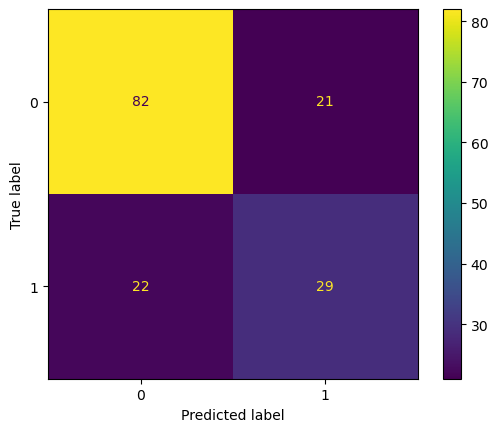

In [89]:
actual = y_test
predicted = y_pred

confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()